In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<ipython-input-3-5cfa784ef125>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
df = pd.read_csv('/content/Nat_Gas (1).csv')

In [5]:
df.head()

,Dates,Prices
0,10/31/20,10.1
1,11/30/20,10.3
2,12/31/20,11.0
3,1/31/21,10.9
4,2/28/21,10.9


In [6]:
df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


In [7]:
df['Dates'] = pd.to_datetime(df['Dates'])


In [8]:
x = df.iloc[:,0]


In [9]:
X1 = x.to_numpy()

In [10]:
X1[0]

numpy.datetime64('2020-10-31T00:00:00.000000000')

In [11]:
y = df.iloc[:,1]


In [12]:
Y1 = y.to_numpy()

In [13]:
x_numeric = ((X1 - np.min(X1)).astype(np.float64))/10**15


In [14]:
x_numeric = x_numeric.reshape(-1, 1)
x_numeric

array([[  0.    ],
       [  2.592 ],
       [  5.2704],
       [  7.9488],
       [ 10.368 ],
       [ 13.0464],
       [ 15.6384],
       [ 18.3168],
       [ 20.9088],
       [ 23.5872],
       [ 26.2656],
       [ 28.8576],
       [ 31.536 ],
       [ 34.128 ],
       [ 36.8064],
       [ 39.4848],
       [ 41.904 ],
       [ 44.5824],
       [ 47.1744],
       [ 49.8528],
       [ 52.4448],
       [ 55.1232],
       [ 57.8016],
       [ 60.3936],
       [ 63.072 ],
       [ 65.664 ],
       [ 68.3424],
       [ 71.0208],
       [ 73.44  ],
       [ 76.1184],
       [ 78.7104],
       [ 81.3888],
       [ 83.9808],
       [ 86.6592],
       [ 89.3376],
       [ 91.9296],
       [ 94.608 ],
       [ 97.2   ],
       [ 99.8784],
       [102.5568],
       [105.0624],
       [107.7408],
       [110.3328],
       [113.0112],
       [115.6032],
       [118.2816],
       [120.96  ],
       [123.552 ]])

In [15]:
model = LinearRegression()
model.fit(x_numeric, y)

LinearRegression()

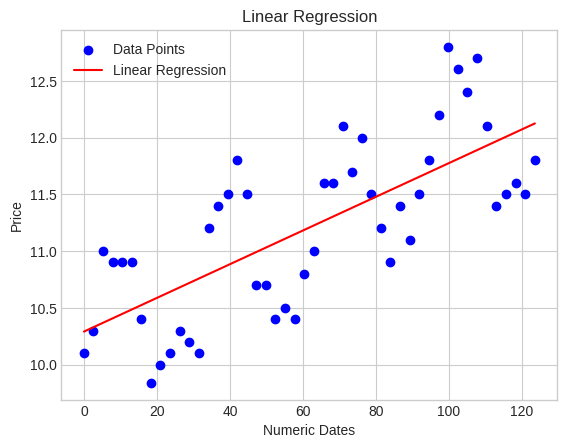

In [16]:
min_date = np.min(x_numeric)
max_date = np.max(x_numeric)
date_range = np.linspace(min_date, max_date, num=100).reshape(-1, 1)

# Make predictions using the date range
predictions = model.predict(date_range)

# Plot the data points and regression line
plt.scatter(x_numeric, y, color='b', label='Data Points')
plt.plot(date_range, predictions, color='r', label='Linear Regression')
plt.xlabel('Numeric Dates')
plt.ylabel('Price')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [17]:
x_pred = np.array(['2024-10-31T00:00:00.000000000', '2024-11-30T00:00:00.000000000',
       '2024-12-31T00:00:00.000000000', '2025-01-31T00:00:00.000000000',
       '2025-02-28T00:00:00.000000000', '2025-03-31T00:00:00.000000000',
       '2025-04-30T00:00:00.000000000', '2025-05-31T00:00:00.000000000',
       '2025-06-30T00:00:00.000000000', '2025-07-31T00:00:00.000000000',
       '2025-08-31T00:00:00.000000000', '2025-09-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [18]:
x_pred_num = (x_pred - np.min(X1)).astype(np.float64)
x_pred_num = x_pred_num.reshape(-1, 1)
x_pred_num = x_pred_num/10**15
x_pred_num

array([[126.2304],
       [128.8224],
       [131.5008],
       [134.1792],
       [136.5984],
       [139.2768],
       [141.8688],
       [144.5472],
       [147.1392],
       [149.8176],
       [152.496 ],
       [155.088 ]])

In [19]:
slope = (model.predict([x_numeric[1]]) - model.predict([x_numeric[0]]))/(x_numeric[1] - x_numeric[0])
slope

array([0.01484229])

In [20]:
from scipy import optimize

In [21]:
def func(x, a, b, c):
  return a + b*x + np.sin(c*x)

In [22]:
y1 = np.array(y)

In [23]:
x1 = x_numeric[:,0]

In [24]:
x1

array([  0.    ,   2.592 ,   5.2704,   7.9488,  10.368 ,  13.0464,
        15.6384,  18.3168,  20.9088,  23.5872,  26.2656,  28.8576,
        31.536 ,  34.128 ,  36.8064,  39.4848,  41.904 ,  44.5824,
        47.1744,  49.8528,  52.4448,  55.1232,  57.8016,  60.3936,
        63.072 ,  65.664 ,  68.3424,  71.0208,  73.44  ,  76.1184,
        78.7104,  81.3888,  83.9808,  86.6592,  89.3376,  91.9296,
        94.608 ,  97.2   ,  99.8784, 102.5568, 105.0624, 107.7408,
       110.3328, 113.0112, 115.6032, 118.2816, 120.96  , 123.552 ])

In [25]:
params, cov = optimize.curve_fit(func, x1, y1, p0 = [10.1, 0.014, 0.2])


In [26]:
params

array([10.05689074,  0.01855927,  0.19919694])

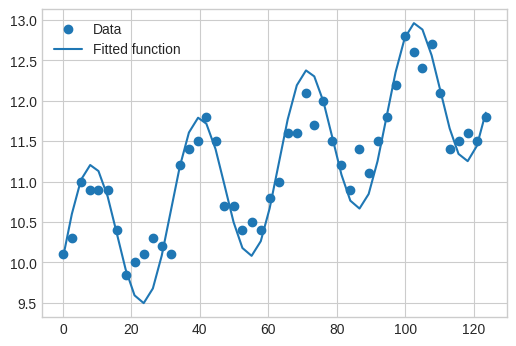

In [27]:
plt.figure(figsize=(6, 4))
plt.scatter(x1, y1, label='Data')
plt.plot(x1, func(x1, params[0], params[1], params[2]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()


In [28]:
#finally predicting the prices for the next year

y_preds_next = func(x_pred_num, params[0], params[1], params[2])

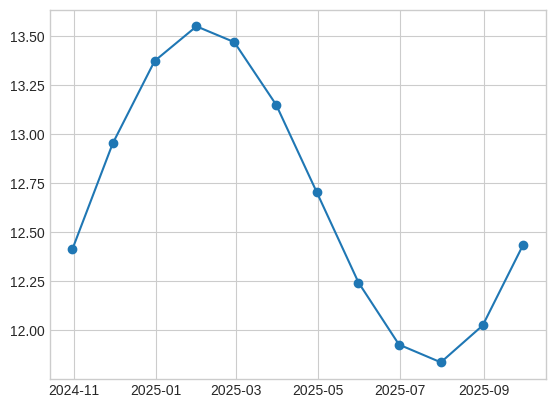

In [29]:
plt.figure()
plt.scatter(x_pred, y_preds_next, label = 'predictions')
plt.plot(x_pred, y_preds_next, label = 'predicted values')

In [30]:
x_final = np.concatenate((x_numeric, x_pred_num))

In [31]:
y_preds_final = func(x_final, params[0], params[1], params[2])

In [32]:
def to_num(dates):
  ls = []
  for item in dates:
    datet = datetime.strptime(item, '%m/%d/%Y')
    datet = np.datetime64(datet)
    ls.append(((datet - np.min(X1)).astype(np.float64))/10**15)
  return ls

In [33]:
to_num(['9/12/2021', '10/12/2021'])


[27.3024, 29.8944]

In [34]:
def find_days(injection_dates, withdrawal_dates):
  inj_ls = np.array([])
  wit_ls = np.array([])
  for item in injection_dates:
    inj_ls = np.append(inj_ls, datetime.strptime(item, '%m/%d/%Y'))
  for item in withdrawal_dates:
    wit_ls = np.append(inj_ls, datetime.strptime(item, '%m/%d/%Y'))
  inj_min = np.min(inj_ls)
  wit_max = np.max(wit_ls)
  days = (wit_max - inj_min).days
  return days


In [35]:
find_days(['7/01/2023', '6/01/2023'], ['7/25/2023', '7/25/2024'])

420

In [39]:
def find_price(dates_num, max_vol):
  total = 0
  for item in dates_num:
    total = total + func(item, params[0], params[1], params[2])*(max_vol/len(dates_num))
  return total


In [45]:
def pricing(injection_dates,withdrawal_dates, injection_rate,withdrawal_rate, max_vol, storage_cost):
  inj_num = to_num(injection_dates)
  wit_num = to_num(withdrawal_dates) #to predict the price at the given dates
  #for storage we need to find the number of days between two dates
  days=find_days(injection_dates, withdrawal_dates)
  store_cost = storage_cost*days

  buy = find_price(inj_num, max_vol)
  sell = find_price(wit_num, max_vol)

  final_price = sell - buy - store_cost - injection_rate*max_vol- withdrawal_rate*max_vol
  return final_price

In [51]:
injection_dates = ['08/28/2025', '08/29/2025', '08/30/2025']
withdrawal_dates = ['02/28/2026', '03/01/2026']
injection_rate = 0.01
withdrawal_rate = 0.01
max_vol = 1000000
storage_cost = 100
contract_value = pricing(injection_dates,withdrawal_dates, injection_rate,withdrawal_rate, max_vol, storage_cost)
contract_value = round(contract_value, 2)

In [52]:
print(f'The final value of the contract is: {contract_value} USD')

The final value of the contract is: 2005468.62 USD
